In [124]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


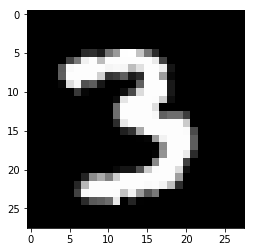

In [13]:
pixels = mnist.test.images[500].reshape((28,28))
plt.imshow(pixels, cmap = 'gray')
plt.show()

In [114]:
print(len(mnist.validation.labels))
test = tf.reshape(mnist.train.images, [-1,28,28,1])
test.shape.as_list()[1:]
#mnist.train.next_batch(10)[1].shape
#mnist.train.next_batch(10)[0].shape


5000


[28, 28, 1]

In [115]:
def conv_layer(data, filter_size, depth, stride):
    
    #data.shape.as_list()[3] == data.shape[3].value
    weights = tf.Variable(tf.truncated_normal([*filter_size,data.shape.as_list()[3],depth], stddev=0.1))
    #maybe adjust bias change from tf.zeros?
    bias = tf.Variable(tf.zeros(depth))
    layer = tf.nn.conv2d(data, weights, [1,stride,stride,1], padding = 'SAME')
    layer = tf.nn.bias_add(layer, bias)
    layer = tf.nn.relu(layer)
    
    return layer

In [116]:
def flatten(data):
    layer = tf.reshape(data,[-1, np.prod(data.shape.as_list()[1:])])
    return layer

In [132]:
def fully_conn(data, num_outputs):
    weights = tf.Variable(tf.truncated_normal([data.shape.as_list()[1], num_outputs], stddev = 0.1))
    bias = tf.Variable(tf.zeros([num_outputs]))
    layer = tf.add(tf.matmul(data, weights),bias)
    layer = tf.nn.relu(layer)
    return layer

In [133]:
def output(data, num_outputs):
    weights = tf.Variable(tf.truncated_normal([data.shape.as_list()[1], num_outputs], stddev=0.1))
    bias = tf.Variable(tf.zeros([num_outputs]))
    out = tf.add(tf.matmul(data, weights),bias)
    return out

In [134]:
def conv_net(data):
    #conv_layer(data, filter_size, depth, stride)
        
    conv1 = conv_layer(data,(5,5),4,1)
    conv2 = conv_layer(conv1, (4,4),8,2)
    conv3 = conv_layer(conv2, (4,4),12,2)
    flat = flatten(conv3)
    fc = fully_conn(flat, 200)
    out = output(fc, 10)
    
    return out

In [217]:
#MODIFY
tf.reset_default_graph()

#x = tf.placeholder(tf.float32, [None, 28, 28, 1],'x')
#y = tf.placeholder(tf.float32, [None,10],'y')

x = tf.placeholder(tf.float32, [None, 784])
x_shaped = tf.reshape(x, [-1,28,28,1])
y = tf.placeholder(tf.float32, [None,10])



# Model
logits = conv_net(x_shaped)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [228]:
epochs = 5
batch_size = 20

In [231]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batches = int(len(mnist.train.labels)/batch_size)
    print(batches)
    for epoch in range(epochs):
        for batch_i in range(1000):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_x, y: batch_y})
            #print(batch_i)
            loss = sess.run(cost, feed_dict = {x:batch_x, y: batch_y})
            test_acc = sess.run(accuracy, feed_dict = {x:mnist.test.images, y:mnist.test.labels})   
        print('Epoch {:>2}, MNIST final batch: '.format(epoch+1), end='')
        print('Loss: {}  Test Accuracy: {}'.format(loss, test_acc))



2750
Epoch  1, MNIST final batch: Loss: 0.04807165637612343  Test Accuracy: 0.9634000658988953
Epoch  2, MNIST final batch: Loss: 0.13587458431720734  Test Accuracy: 0.9707001447677612
Epoch  3, MNIST final batch: Loss: 0.012726414017379284  Test Accuracy: 0.9792001247406006
Epoch  4, MNIST final batch: Loss: 0.07085911929607391  Test Accuracy: 0.9824001789093018
Epoch  5, MNIST final batch: Loss: 0.02223198674619198  Test Accuracy: 0.9803001284599304
